In [1]:
HASH = "2626617560ea452db5aa07dc6fc2b40e"
img_path = '/home/Data/leaderboard/acc9/image'
reconstruction_path = f'reconstructions/{HASH}/private'

In [2]:
import os
import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch
from fastmri.losses import SSIMLoss

In [19]:
img_idx = 16
file_list = os.listdir(img_path)
h5py_file = h5py.File(os.path.join(img_path, file_list[img_idx]), 'r')
reconstrucion_file_list = os.listdir(reconstruction_path)
reconstruction_file = h5py.File(os.path.join(reconstruction_path, reconstrucion_file_list[img_idx]))

In [20]:
grappa = h5py_file["image_grappa"]
input_image = h5py_file["image_input"]
gt_image = h5py_file["image_label"]
reconstruction = reconstruction_file["reconstruction"]

In [21]:
idx = 5
grappa[idx, :, :].max(), gt_image[idx, :, :].max(), reconstruction[idx, :, :].max()

(0.0008580493, 0.00065970386, 0.0006357415)

In [22]:
loss = SSIMLoss()
gt = gt_image[idx, :, :]
re = reconstruction[idx]
1 - loss(
    torch.from_numpy(gt_image[idx:idx+1]),
    torch.from_numpy(reconstruction[idx:idx+1] / re.max() * gt.max()),
    torch.tensor([h5py_file.attrs["max"]]),
)

tensor(0.9361, dtype=torch.float64)

In [28]:
loss = SSIMLoss()
gt = gt_image[idx, :, :]
re = reconstruction[idx]
1 - loss(
    torch.from_numpy(gt_image[idx:idx+1]),
    torch.from_numpy(reconstruction[idx:idx+1]),
    torch.tensor([h5py_file.attrs["max"]]),
)

tensor(0.9349, dtype=torch.float64)

In [23]:

re.max()

0.0006357415

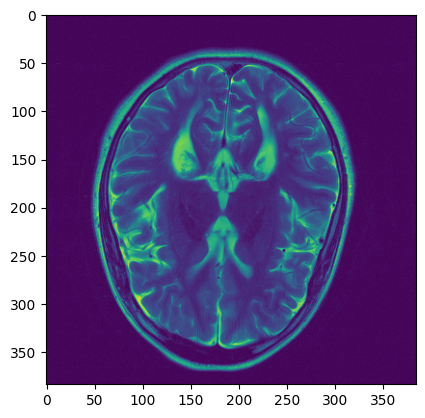

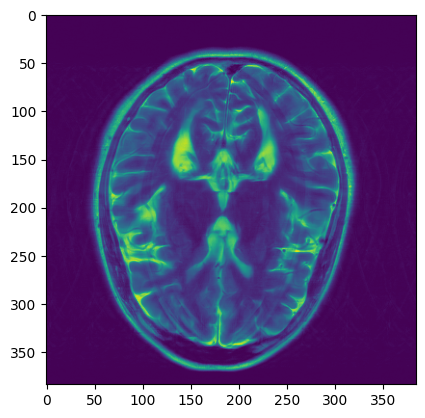

In [24]:
plt.imshow(gt_image[0, :, :])
plt.show()
plt.imshow(reconstruction[0, :, :])


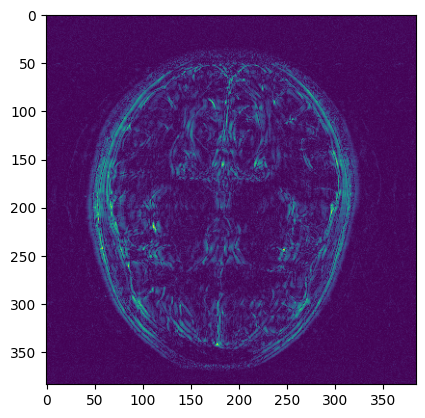

In [25]:
diff = gt_image[0, :, :] - reconstruction[0, :, :]
plt.imshow(np.abs(diff))

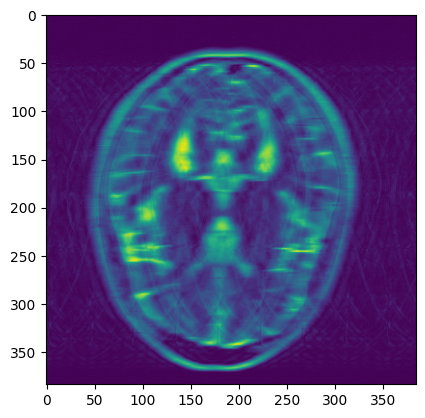

In [26]:
plt.imshow(input_image[0, :, :])

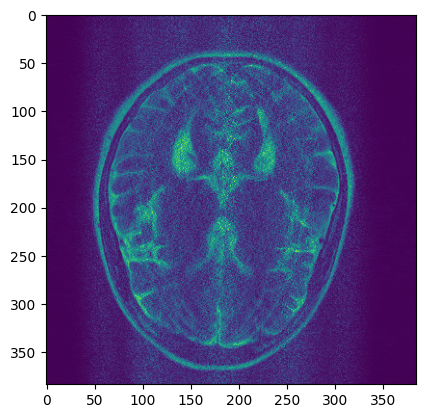

In [27]:
plt.imshow(grappa[0, :, :])

- Task 1: Grappa Data만으로 SSIM을 계산해보기.
- Task 2: Grappa Data를 포함하는 두개의 이미지를 NAFNet에 통과시킬 수 있게 만들기.